In [7]:
%matplotlib inline

In [8]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [9]:
with open('movie_data.txt') as json_file:
    data = json.load(json_file)


In [15]:
actors = {}
actor_list = []
actor_list_all = []
actor_box = {}

for year in list(data.keys()):
    movies = list(data[year].keys())
    actor_list = []
    boxes = []
    for movie in movies:
        try:
            actor = data[year][movie]['Actors'].split(', ')
            box = data[year][movie]['BoxOffice']
            box_vals=[]
            for i in actor:
                actor_list.append(i)
                boxes.append(box)
                actor_list_all.append(i)
                
        except Exception as e:
            print(str(e)+" Year: "+year+" Movie: "+movie)
    actors[year] = actor_list
    actor_box[year] = boxes

actor_df={}
for year in list(data.keys()):
    actorbox={}
    for i in range(len(actor_box[year])):
        
        if actors[year][i] not in list(actorbox.keys()):
            actorbox[actors[year][i]] = [actor_box[year][i]]
        else:
            actorbox[actors[year][i]].append(actor_box[year][i])
    actor_df[year] = actorbox

for y in list(actor_df.keys()):
    for actor in list(actor_df[y].keys()):
        actor_df[y][actor] = {'box_total': sum(actor_df[y][actor]),
                  'movie_actor_count': len(actor_df[y][actor]),
                  'box_per_movie': sum(actor_df[y][actor])/len(actor_df[y][actor])}

# Example
actor_df['2020']
                             
                                                           
                                                    


{'Will Smith': {'box_total': 206305244,
  'movie_actor_count': 1,
  'box_per_movie': 206305244.0},
 'Martin Lawrence': {'box_total': 206305244,
  'movie_actor_count': 1,
  'box_per_movie': 206305244.0},
 'Vanessa Hudgens': {'box_total': 206305244,
  'movie_actor_count': 1,
  'box_per_movie': 206305244.0},
 'Ben Schwartz': {'box_total': 148974665,
  'movie_actor_count': 1,
  'box_per_movie': 148974665.0},
 'James Marsden': {'box_total': 148974665,
  'movie_actor_count': 1,
  'box_per_movie': 148974665.0},
 'Jim Carrey': {'box_total': 148974665,
  'movie_actor_count': 1,
  'box_per_movie': 148974665.0},
 'Margot Robbie': {'box_total': 84158461,
  'movie_actor_count': 1,
  'box_per_movie': 84158461.0},
 'Rosie Perez': {'box_total': 84158461,
  'movie_actor_count': 1,
  'box_per_movie': 84158461.0},
 'Mary Elizabeth Winstead': {'box_total': 84158461,
  'movie_actor_count': 1,
  'box_per_movie': 84158461.0},
 'Robert Downey Jr.': {'box_total': 77047065,
  'movie_actor_count': 1,
  'box_per_

In [16]:
unique_actors = pd.Series(actor_list_all).unique()
unique_actors

box_val_time={}
for i in unique_actors:
    rev = []
    for year in list(actor_df.keys()):
        try:
            rev.append(actor_df[year][i]['box_per_movie'])
        except:
            rev.append(0)
    box_val_time[i] = rev

# Example
box_val_time["Vin Diesel"]

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 144533925.0,
 142109382.0,
 0,
 0,
 113086868.0,
 0,
 0,
 0,
 0,
 0,
 209837675.0,
 0,
 0,
 333718600.0,
 353007020.0,
 0,
 226008385.0,
 0,
 0,
 12561824.0]

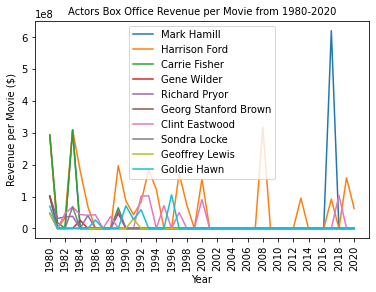

In [17]:
x_vals = list(actor_df.keys())
y_vals = []

for actor in unique_actors[:10]:
    y_vals = box_val_time[actor]
    plt.plot(x_vals,y_vals)

plt.xticks(np.arange(0, 42, step=2),rotation = 90)
plt.xlabel('Year')
plt.ylabel('Revenue per Movie ($)')
plt.legend(unique_actors[:10]);
plt.title('Actors Box Office Revenue per Movie from 1980-2020',fontsize=10)
plt.show()

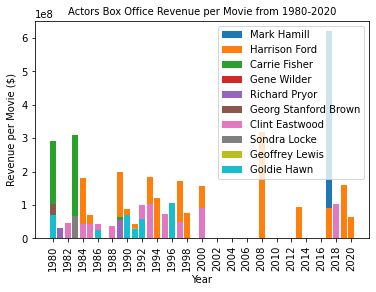

In [18]:
x_vals = list(actor_df.keys())
y_vals = []

for actor in unique_actors[:10]:
    y_vals = box_val_time[actor]
    plt.bar(x_vals,y_vals)

plt.xticks(np.arange(0, 42, step=2),rotation = 90)
plt.xlabel('Year')
plt.ylabel('Revenue per Movie ($)')
plt.legend(unique_actors[:10]);
plt.title('Actors Box Office Revenue per Movie from 1980-2020',fontsize=10)
plt.show()